In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data
df = pd.read_csv(r'C:\Users\JA91\Desktop\PortfolioProject\movies.csv') # Include 'r'

In [3]:
# Let's Look At The Data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [8]:
# Data Types For Our Columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [12]:
# Change Data Type Of Columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [78]:
# Create Correct Year Column

df['correctyear'] = df['released'].astype(str).str[:4]

In [59]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [92]:
pd.set_option('display.max_rows', 20)

In [93]:
# Drop Any Duplcates

df['company'].drop_duplicates().sort_values(ascending=False)

5288    2178
3486    2177
6084    2176
3225    2175
2707    2174
1495    2173
5905    2172
5917    2171
3126    2170
329     2169
        ... 
6270       9
3878       8
6482       7
3521       6
3226       5
3527       4
5466       3
2815       2
3208       1
3832       0
Name: company, Length: 2179, dtype: int16

In [27]:
# HYPOTHESIS
# Budget High Correlation
# Company High Correlation 

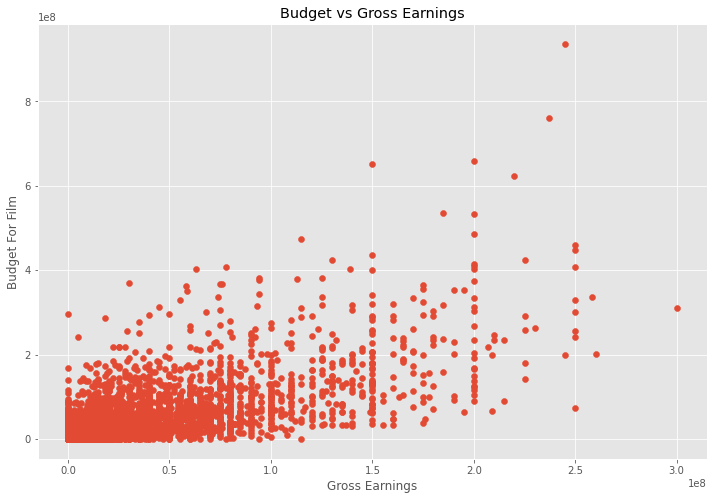

In [33]:
# Scatter Plot With Budget VS Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

plt.show()

In [57]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,correctyear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

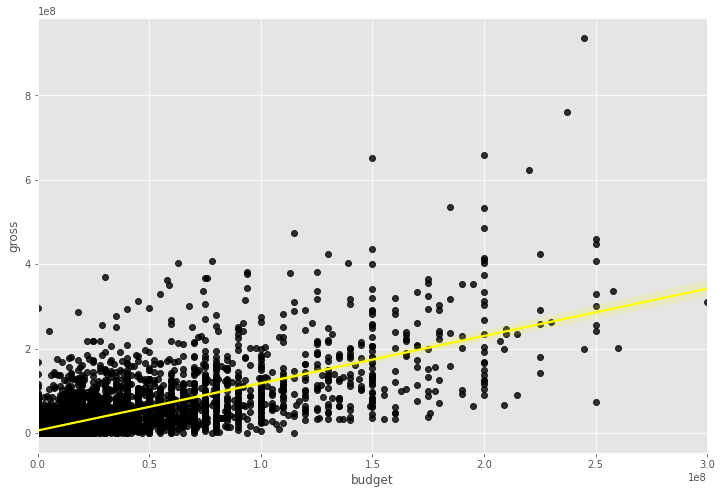

In [43]:
# Plot Budget VS Gross Using Seasborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color":"yellow"})

In [49]:
#Let's Start Looking At Correlation

df.corr(method='pearson') #Pearson, Kendall, Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [50]:
# High Correlation Between Budget And Gross
# I was Right

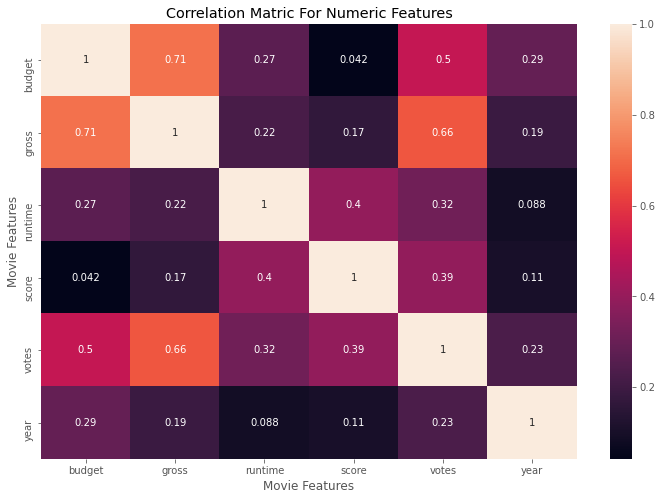

In [53]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [60]:
# Look At Company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,correctyear
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012,2012


In [94]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,correctyear
6380,245000000,1428,54,1037,0,936662225,4679,7,29,136,8.1,475,687192,2356,2015,29,22
5061,237000000,2062,53,1066,0,760507625,501,7,23,162,7.8,2084,954412,1629,2009,23,16
2420,200000000,2062,54,1066,6,658672302,6177,7,11,194,7.8,1444,862554,1629,1997,11,3
6391,150000000,2085,54,466,0,652270625,2721,7,29,124,7.0,404,469200,3310,2015,29,22
5723,220000000,1491,54,1412,0,623357910,4995,7,26,143,8.1,2001,1064633,2145,2012,26,19
4840,185000000,2123,54,440,0,534858444,5189,7,22,152,9.0,408,1839571,2090,2008,22,15
6614,200000000,1428,54,835,0,532177324,4206,7,30,133,7.9,739,365473,625,2016,30,24
6687,200000000,1720,54,128,2,486295561,1836,6,30,97,7.4,678,173005,201,2016,30,24
2870,115000000,1428,54,885,0,474544677,4675,6,13,136,6.5,729,584809,1334,1999,13,5
6398,250000000,1491,54,1412,0,459005868,502,7,29,141,7.4,2001,537832,2145,2015,29,22


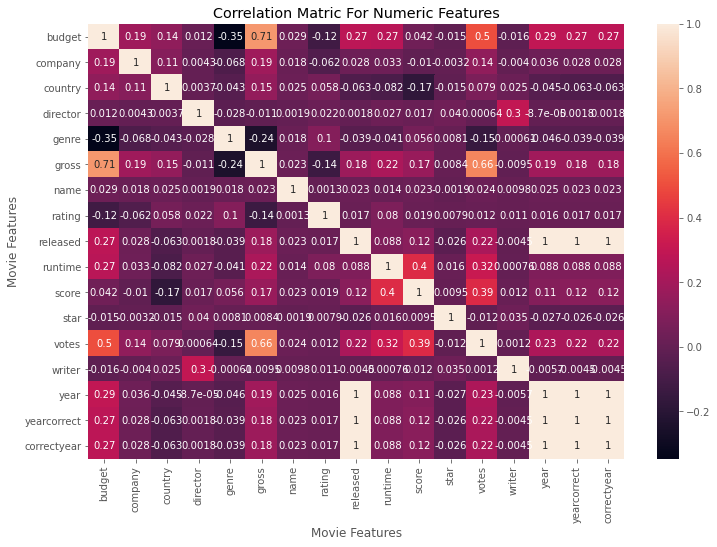

In [65]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [67]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,correctyear
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.274820,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.028012,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062707,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001823,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039014,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.176879,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.176879,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.023411,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.017438,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.017438,0.017438
released,0.274820,0.028012,-0.062707,0.001823,-0.039014,0.176879,0.023411,0.017438,1.000000,0.088342,0.117679,-0.026052,0.220797,-0.004546,0.996229,1.000000,1.000000
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.088342,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342,0.088342


In [79]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()


In [80]:
sorted_pairs = corr_pairs.sort_values()


In [76]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        budget         0.503924
budget       votes          0.503924
gross        votes          0.662457
votes        gross          0.662457
gross        budget         0.712196
budget       gross          0.712196
yearcorrect  year           0.996229
year         yearcorrect    0.996229
correctyear  year           0.996229
year         correctyear    0.996229
             released       0.996229
released     year           0.996229
yearcorrect  correctyear    1.000000
             yearcorrect    1.000000
correctyear  released       1.000000
budget       budget         1.000000
released     released       1.000000
year         year           1.000000
company      company        1.000000
country      country        1.000000
director     director       1.000000
genre        genre          1.000000
gross        gross          1.000000
name         name           1.000000
rating       rating         1.000000
correctyear  yearcorrect    1.000000
released     yearcorrect    1.000000
 

In [77]:
# Votes And Budget Have The Highest Correlation To Gross Earnings

# Company Has Low Correlation

# I Was Wrong